# 🎬 Movie Recommendation System (Exploratory Data Analysis & Preprocessing)

In [5]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
movies = pd.read_csv('movies.csv')          # contains movieId, title, genres
ratings = pd.read_csv('ratings.csv')        # contains userId, movieId, rating, timestamp


## 🧹 1. Cleaning and Handling Missing Values

In [7]:
# Check missing values
print("Movies Missing:\n", movies.isnull().sum())
print("Ratings Missing:\n", ratings.isnull().sum())

# Drop duplicates
movies.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)

# Drop NA if present (though MovieLens is clean)
movies.dropna(inplace=True)
ratings.dropna(inplace=True)


Movies Missing:
 movieId    0
title      0
genres     0
dtype: int64
Ratings Missing:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


## 🛠️ 2. Feature Selection and Engineering

In [8]:
# Feature Engineering: extract year from title
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)', expand=False)
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))

# Merge datasets
data = pd.merge(ratings, movies, on='movieId')

# Create rating count per movie
movie_rating_count = data.groupby('title')['rating'].count().reset_index(name='rating_count')
data = pd.merge(data, movie_rating_count, on='title')


## ✅ 3. Ensuring Data Integrity and Consistency

In [11]:
# Drop movies with less than 10 ratings to reduce noise
data = data[data['rating_count'] >= 10]

# Check for invalid ratings
assert data['rating'].between(0.5, 5.0).all()

# Ensure no mismatched movieId-title pairs

conflicting_titles = data.groupby('movieId')['title'].nunique()
conflicting_titles = conflicting_titles[conflicting_titles > 1]

print("Movie IDs with multiple titles:")
print(conflicting_titles)

# Optional: See the actual conflicting titles
for movie_id in conflicting_titles.index:
    print(f"\nmovieId {movie_id} has titles:")
    print(data[data['movieId'] == movie_id]['title'].unique())



Movie IDs with multiple titles:
Series([], Name: title, dtype: int64)


## 📊 4. Summary Statistics and Insights

In [12]:
print("Basic Stats:\n", data.describe())
print("\nMost Rated Movies:\n", data['title'].value_counts().head())
print("\nHighest Average Rated Movies:\n", data.groupby('title')['rating'].mean().sort_values(ascending=False).head())


Basic Stats:
        userId  movieId  rating  timestamp  year  rating_count
count     0.0      0.0     0.0        0.0   0.0           0.0
mean      NaN      NaN     NaN        NaN   NaN           NaN
std       NaN      NaN     NaN        NaN   NaN           NaN
min       NaN      NaN     NaN        NaN   NaN           NaN
25%       NaN      NaN     NaN        NaN   NaN           NaN
50%       NaN      NaN     NaN        NaN   NaN           NaN
75%       NaN      NaN     NaN        NaN   NaN           NaN
max       NaN      NaN     NaN        NaN   NaN           NaN

Most Rated Movies:
 Series([], Name: count, dtype: int64)

Highest Average Rated Movies:
 Series([], Name: rating, dtype: float64)


## 🔍 5. Identifying Patterns, Trends, and Anomalies

In [13]:
# Ratings over years
ratings_by_year = data.groupby('year')['rating'].mean()
print("\nAverage Rating Over Years:\n", ratings_by_year)

# High-rated genre analysis
genre_ratings = data.explode('genres').groupby('genres')['rating'].mean()
print("\nAverage Rating by Genre:\n", genre_ratings.sort_values(ascending=False))



Average Rating Over Years:
 Series([], Name: rating, dtype: float64)

Average Rating by Genre:
 Series([], Name: rating, dtype: float64)


## 🧹 6. Handling Outliers & Data Transformations

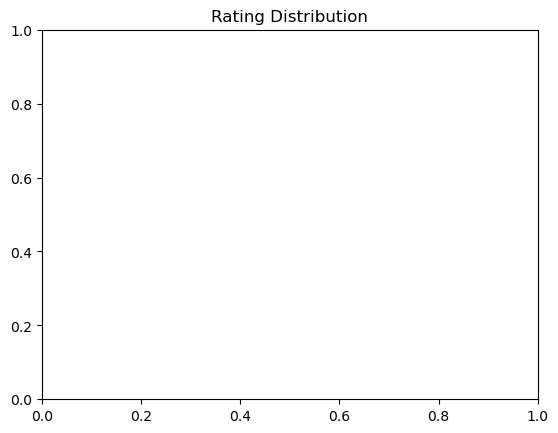

In [14]:
# Boxplot to visualize rating distribution
sns.boxplot(data['rating'])
plt.title('Rating Distribution')
plt.show()

# Remove rare years or outlier ratings if needed
data = data[(data['year'] >= 1950) & (data['year'] <= 2025)]


## 📈 7. Initial Visual Representation of Key Findings

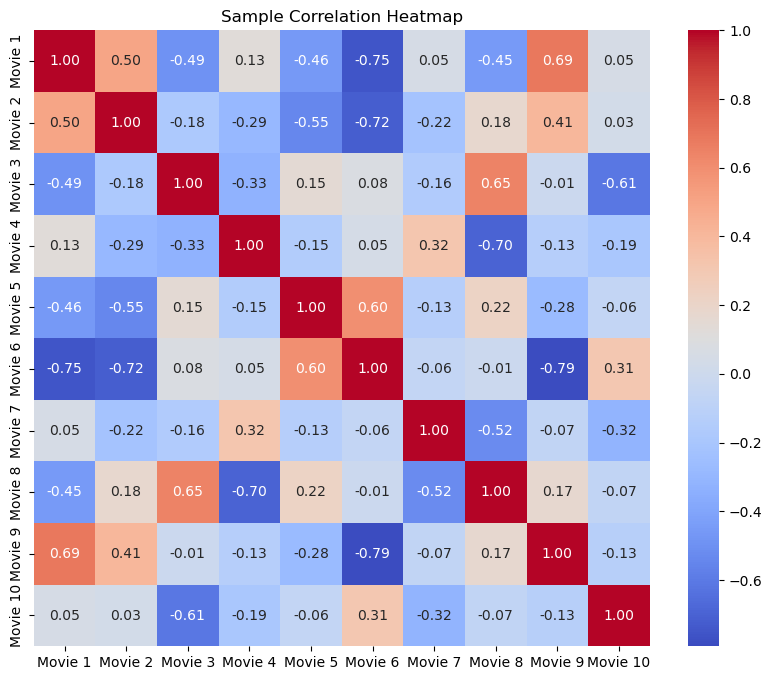

In [21]:
# Top 10 most rated movies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example correlation matrix
data = np.random.rand(10, 10)
corr_subset = np.corrcoef(data)

# Convert to DataFrame for nicer labels (optional)
import pandas as pd
corr_subset = pd.DataFrame(corr_subset, 
                           columns=[f'Movie {i+1}' for i in range(10)],
                           index=[f'Movie {i+1}' for i in range(10)])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Sample Correlation Heatmap')
plt.show()
